In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import geopandas as gpd
import seaborn as sns
import scipy.stats as stats

In [123]:
actors = pd.read_csv("./main_data/actors.csv")
countries = pd.read_csv("./main_data/countries.csv")
crew = pd.read_csv("./main_data/crew.csv")
genres = pd.read_csv("./main_data/genres.csv")
languages = pd.read_csv("./main_data/languages.csv")
movies = pd.read_csv("./main_data/movies.csv")
releases = pd.read_csv("./main_data/releases.csv")
rotten_tomatoes_review = pd.read_csv("./main_data/rotten_tomatoes_reviews.csv")
studios = pd.read_csv("./main_data/studios.csv")
the_oscar_awards = pd.read_csv("./main_data/the_oscar_awards.csv")

file_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"


In [73]:
# Pulizia del dataset actors
actors = pd.read_csv("./main_data/actors.csv")

nomiNulli = actors["name"].isna().sum()
ruoliNulli = actors["role"].isna().sum()
righe_entrambi_nan = actors[actors["name"].isna() & actors["role"].isna()]

print(f"Numero di NaN nella colonna 'name' sono: {nomiNulli}")
print(f"Numero di NaN nella colonna 'role' sono: {ruoliNulli}")
print(f"Numero di righe con 'name' E 'role' NaN (verranno eliminate): {len(righe_entrambi_nan)}")

# Rimuovi righe dove sia 'name' che 'role' sono NaN
actors.dropna(subset=["name", "role"], how="all", inplace=True)

name_nan_residui = actors["name"].isna().sum()
role_nan_residui = actors["role"].isna().sum()

print(f"Numero di 'name' NaN residui prima della sostituzione: {name_nan_residui}")
print(f"Numero di 'role' NaN residui prima della sostituzione: {role_nan_residui}")

# Sostituisci i NaN residui con 'Sconosciuto'
actors["name"] = actors["name"].fillna("Sconosciuto")
actors["role"] = actors["role"].fillna("Sconosciuto")

name_sconosciuto = (actors["name"] == "Sconosciuto").sum()
role_sconosciuto = (actors["role"] == "Sconosciuto").sum()

print(f"Numero di 'name' settati a 'Sconosciuto': {name_sconosciuto}")
print(f"Numero di 'role' settati a 'Sconosciuto': {role_sconosciuto}")

# Duplicati
duplicatiMask = actors.duplicated(subset=["id", "name", "role"], keep=False)
numeroDuplicati = duplicatiMask.sum()

print(f"Numero di duplicati in actors: {numeroDuplicati}")

# Elimina duplicati
actors.drop_duplicates(subset=["id", "name", "role"], inplace=True)

# Controllo: righe con valori non stringa (escludendo la colonna 'id')
non_string_mask = actors.drop(columns="id").map(lambda x: not isinstance(x, str))
righe_con_errori = actors[non_string_mask.any(axis=1)]

print(f"Numero di righe con valori non stringa (escluse 'id'): {len(righe_con_errori)}")
if not righe_con_errori.empty:
    print(righe_con_errori.head(10))

Numero di NaN nella colonna 'name' sono: 4
Numero di NaN nella colonna 'role' sono: 1361559
Numero di righe con 'name' E 'role' NaN (verranno eliminate): 2
Numero di 'name' NaN residui prima della sostituzione: 2
Numero di 'role' NaN residui prima della sostituzione: 1361557
Numero di 'name' settati a 'Sconosciuto': 2
Numero di 'role' settati a 'Sconosciuto': 1361559
Numero di duplicati in actors: 1826
Numero di righe con valori non stringa (escluse 'id'): 0


In [74]:
# Pulizia del dataset crew
crew = pd.read_csv("./main_data/crew.csv")

nomiNulli = crew["name"].isna().sum()
ruoliNulli = crew["role"].isna().sum()
righe_entrambi_nan = crew[crew["name"].isna() & crew["role"].isna()]

print(f"Numero di NaN nella colonna 'name' sono: {nomiNulli}")
print(f"Numero di NaN nella colonna 'role' sono: {ruoliNulli}")
print(f"Numero di righe con 'name' E 'role' NaN (verranno eliminate): {len(righe_entrambi_nan)}")

# Rimuovi righe dove sia 'name' che 'role' sono NaN
crew.dropna(subset=["name", "role"], how="all", inplace=True)

name_nan_residui = crew["name"].isna().sum()
role_nan_residui = crew["role"].isna().sum()

print(f"Numero di 'name' NaN residui prima della sostituzione: {name_nan_residui}")
print(f"Numero di 'role' NaN residui prima della sostituzione: {role_nan_residui}")

# Sostituisci i NaN residui con 'Sconosciuto'
crew["name"] = crew["name"].fillna("Sconosciuto")
crew["role"] = crew["role"].fillna("Sconosciuto")

name_sconosciuto = (crew["name"] == "Sconosciuto").sum()
role_sconosciuto = (crew["role"] == "Sconosciuto").sum()

print(f"Numero di 'name' settati a 'Sconosciuto': {name_sconosciuto}")
print(f"Numero di 'role' settati a 'Sconosciuto': {role_sconosciuto}")

# Duplicati
duplicatiMask = crew.duplicated(subset=["id", "name", "role"], keep=False)
duplicati = duplicatiMask.sum()

print(f"Numero di duplicati in crew: {duplicati}")

crew.drop_duplicates(subset=["id", "name", "role"],inplace=True)

# Controllo: righe con valori non stringa (escludendo la colonna 'id')
non_string_mask = crew.drop(columns="id").map(lambda x: not isinstance(x, str))
righe_con_errori = crew[non_string_mask.any(axis=1)]

print(f"Numero di righe con valori non stringa (escluse 'id'): {len(righe_con_errori)}")
if not righe_con_errori.empty:
    print(righe_con_errori.head(10))

Numero di NaN nella colonna 'name' sono: 1
Numero di NaN nella colonna 'role' sono: 0
Numero di righe con 'name' E 'role' NaN (verranno eliminate): 0
Numero di 'name' NaN residui prima della sostituzione: 1
Numero di 'role' NaN residui prima della sostituzione: 0
Numero di 'name' settati a 'Sconosciuto': 1
Numero di 'role' settati a 'Sconosciuto': 0
Numero di duplicati in crew: 2496
Numero di righe con valori non stringa (escluse 'id'): 0


In [75]:
#pulizia dataset Generi
genres = pd.read_csv("./main_data/genres.csv")

generiNulli = genres['genre'].isna().sum()
print(f"Numero di NaN nella colonna 'genre' sono: {nomiNulli}")
genres.dropna(subset=["genre"],inplace=True)
genres.drop_duplicates(subset=["id", "genre"],inplace=True)

# 1. Uniforma tutto in minuscolo
genres['genre'] = genres['genre'].str.lower()

# 2. Rimuovi spazi bianchi residui (prima e dopo)
genres['genre'] = genres['genre'].str.strip()

# 3. Correggi varianti e errori di scrittura con una mappatura di sostituzione
correzioni = {
    'scifi': 'science fiction',
    'sci-fi': 'science fiction',
    'documentaries': 'documentary',
    'tv movies': 'tv movie'
}

genres['genre'] = genres['genre'].replace(correzioni)

# 4. Visualizza i generi unici finali per controllo
print("Generi unici dopo pulizia:")
print(genres['genre'].unique())

Numero di NaN nella colonna 'genre' sono: 1
Generi unici dopo pulizia:
['comedy' 'adventure' 'thriller' 'drama' 'science fiction' 'action'
 'music' 'romance' 'history' 'crime' 'animation' 'mystery' 'horror'
 'family' 'fantasy' 'war' 'western' 'tv movie' 'documentary']


In [76]:
#pulizia dataset lingue
languages = pd.read_csv("./main_data/languages.csv")

# 1. Se type è NaN ma language c'è, metti type = "language"
languages.loc[languages['type'].isna() & languages['language'].notna(), 'type'] = 'language'

# 2. Droppa righe dove manca language (NaN) o manca sia type che language
languages.dropna(subset=['language'], inplace=True)
languages.dropna(subset=['type'], inplace=True)

# 3. Rimuovi duplicati perfetti su id, type, language (prima di uniformare)
languages.drop_duplicates(subset=['id', 'type', 'language'], inplace=True)

# 4. Uniforma: strip spazi e lowercase su 'type' e 'language'
languages['type'] = languages['type'].str.strip().str.lower()
languages['language'] = languages['language'].str.strip().str.lower()

# 5. Correzioni con mapping per 'type' e 'language'
type_corrections = {
    'spoken language': 'spoken language',
    'language': 'language',
    'primary language': 'primary language',
    # eventuali altre correzioni o sinonimi
}
languages['type'] = languages['type'].replace(type_corrections)


languages['language'] = languages['language'].str.replace('\xa0', ' ', regex=False).str.strip()

# Dividi le stringhe con virgole in liste
languages['language'] = languages['language'].str.split(',')
languages = languages.explode('language')
languages['language'] = languages['language'].str.strip()


language_corrections = {
    'eng': 'english',
    'haitian creole': 'haitian creole',
    'persian (farsi)': 'persian',
    'hebrew (modern)': 'hebrew',
    'greek (modern)': 'greek',
    'tibetan standard': 'tibetan',
    'tibetan central': 'tibetan',
    'chewa': 'chichewa',
    'nyanja': 'chichewa',
    'gaelic': 'scottish gaelic',
    'navaho': 'navajo',
    'chuang': 'zhuang',
    'interlingue': 'interlingua',
    'ojibwa': 'ojibwe',
    'puular': 'fula',
    'pular': 'fula',
    'fulah': 'fula',
    'pulaar': 'fula',
    'old church slavonic': 'church slavonic',
    'old bulgarian': 'church slavonic',
    'pushto': 'pashto',
    'ossetic': 'ossetian',
    'limburgan': 'limburgish',
    'limburger': 'limburgish',
    'eastern panjabi': 'eastern punjabi',
    'kuanyama': 'kwanyama',
    "sanskrit (saṁskṛta)": "sanskrit",
    "divehi": "dhivehi",
    'tonga (tonga islands)': 'tonga',
    # eventuali altre correzioni o sinonimi
}
languages['language'] = languages['language'].replace(language_corrections)

# 6. (opzionale) Mostra valori unici per controllo finale
print("Valori unici in 'type':", languages['type'].unique())
print("Valori unici in 'language':", languages['language'].unique())

Valori unici in 'type': ['language' 'primary language' 'spoken language']
Valori unici in 'language': ['english' 'korean' 'german' 'cantonese' 'chinese' 'dutch' 'spanish'
 'french' 'japanese' 'swedish' 'swahili' 'portuguese' 'hindi' 'italian'
 'tagalog' 'xhosa' 'latin' 'russian' 'finnish' 'hungarian' 'somali'
 'romanian' 'vietnamese' 'turkish' 'czech' 'estonian' 'persian' 'urdu'
 'arabic' 'polish' 'hebrew' 'greek' 'yiddish' 'norwegian' 'haitian'
 'haitian creole' 'khmer' 'nepali' 'akan' 'icelandic' 'malay'
 'eastern punjabi' 'georgian' 'indonesian' 'belarusian' 'danish' 'tamil'
 'sinhalese' 'sinhala' 'tibetan' 'central' 'armenian' 'thai' 'telugu'
 'scottish gaelic' 'northern sami' 'esperanto' 'bulgarian' 'afrikaans'
 'chichewa' 'southern sotho' 'zulu' 'irish' 'breton' 'croatian' 'bengali'
 'bangla' 'welsh' 'navajo' 'albanian' 'inuktitut' 'catalan' 'quechua'
 'azerbaijani' 'samoan' 'ukrainian' 'mongolian' 'māori' 'tatar' 'mayan'
 'fula' 'slovak' 'lithuanian' 'cree' 'lao' 'galician' 'amh

In [77]:
# Pulizia del dataset movies
# Eliminiamo gli id duplicati
movies.drop_duplicates(subset=movies.columns.difference(['id']), keep='first',inplace=True)

# Eliminiamo i dulicati che hanno id diverso ma tutti gli altri campi uguali
movies.drop_duplicates(subset=["name","date","tagline","description","minutes","rating"],inplace=True)

# Contiamo, per farci un'idea, i campi NaN
nomiNulli = movies["name"].isna().sum()
print(f"Numero di NaN nella colonna 'name': {nomiNulli}")
dateNulle = movies["date"].isna().sum()
print(f"Numero di NaN nella colonna 'date': {dateNulle}")
minutiNulli = movies["minutes"].isna().sum()
print(f"Numero di NaN nella colonna 'minute': {minutiNulli}")
ratingNullo = movies["rating"].isna().sum()
print(f"Numero di NaN nella colonna 'rating': {ratingNullo}")



# Eliminiamo i 2 dati sui film NaN
movies.dropna(subset=["name"],inplace=True)
nomiNulli = movies["name"].isna().sum()
print(f"Numero di NaN nella colonna 'name': {nomiNulli}")

Numero di NaN nella colonna 'name': 5
Numero di NaN nella colonna 'date': 89827
Numero di NaN nella colonna 'minute': 179090
Numero di NaN nella colonna 'rating': 846551
Numero di NaN nella colonna 'name': 0


In [78]:
non_nan_date_movies = movies["date"].dropna()
# Controlliamo se tutti i valori non NaN sono compresi tra 1888 e 2024
are_all_in_range = non_nan_date_movies.between(1877, 2025).all()

if are_all_in_range:
    print("Tutti i valori non NaN nella colonna 'date' sono compresi tra 1888 e 2024.")
else:
    print("Alcuni valori non NaN nella colonna 'date' NON rientrano nel range 1888-2024.")

#############

# Troviamo i valori non NaN che non sono compresi tra 1888 e 2025
out_of_range = non_nan_date_movies[~non_nan_date_movies.between(1877, 2024)]

print("Valori non NaN che NON rientrano nel range 1888-2024:")
print(out_of_range)

Alcuni valori non NaN nella colonna 'date' NON rientrano nel range 1888-2024.
Valori non NaN che NON rientrano nel range 1888-2024:
3657      2025.0
4679      2026.0
7227      2025.0
7441      2025.0
7787      2025.0
           ...  
932230    2025.0
940009    2030.0
940010    2025.0
940011    2025.0
940012    2025.0
Name: date, Length: 416, dtype: float64


In [79]:
# Pulizia del dataset studios
studioNulli = studios["studio"].isna().sum()
print(f"Numero di NaN nella colonna 'studio': {studioNulli}")

# Eliminiamo gli studios senza nome
studios.dropna(subset=["studio"],inplace=True)

studioNulli = studios["studio"].isna().sum()
print(f"Numero di NaN nella colonna 'studio': {studioNulli}")

Numero di NaN nella colonna 'studio': 10
Numero di NaN nella colonna 'studio': 0


In [80]:
#pulizia del dataset releases
releases.drop_duplicates(subset=["id","country","date","type","rating"])

,id,country,date,type,rating
0,1000001,Andorra,2023-07-21,Theatrical,NaN
1,1000001,Argentina,2023-07-20,Theatrical,ATP
2,1000001,Australia,2023-07-19,Theatrical,PG
3,1000001,Australia,2023-10-01,Digital,PG
4,1000001,Austria,2023-07-20,Theatrical,NaN
...,...,...,...,...,...
1332777,1940967,USA,1909-01-01,Theatrical,NaN
1332778,1940968,Sweden,1908-11-11,Theatrical,NaN
1332779,1940969,France,1902-01-01,Theatrical,NaN
1332780,1940970,France,1902-01-01,Theatrical,NaN


In [81]:
 #pulizia dati

In [82]:
 #pulizia dati

In [83]:
 #pulizia dati

In [84]:
 #pulizia dati

In [85]:
 #pulizia dati

In [86]:
#attori con più film

import pandas as pd
import plotly.express as px

# 1. Conta il numero di film per attore (usando id unici)
actor_film_counts = (
    actors.groupby('name')['id']
    .nunique()
    .reset_index(name='Numero di Film')
    .sort_values(by='Numero di Film', ascending=False)
)

# 2. Prendi i Top 10 attori
top_actors = actor_film_counts.head(30)

# 3. Crea il grafico bar con Plotly
fig = px.bar(
    top_actors,
    x='name',
    y='Numero di Film',
    text='Numero di Film',
    title='Top 10 Attori con più Film',
    labels={'name': 'Attore', 'Numero di Film': 'Film Realizzati'},
    template='plotly_white'
)

# 4. Migliora la leggibilità del grafico
fig.update_traces(
    textposition='outside',
    marker_color='mediumseagreen'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Numero di Film',
    margin=dict(t=80),
    height=600
)

# 5. Mostra il grafico
fig.show()


In [87]:
import pandas as pd
import plotly.express as px

# 1. Conta i film unici per ogni attore e ruolo
role_counts = (
    actors.groupby(['name', 'role'])['id']
    .nunique()
    .reset_index(name='count')
)

# 2. Tieni solo i ruoli ripetuti almeno 2 volte
repeated_roles = role_counts[role_counts['count'] >= 2].copy()

# 3. Calcola il totale di ripetizioni per ogni attore
total_repeats = (
    repeated_roles.groupby('name')['count']
    .sum()
    .reset_index(name='Totale Ripetizioni')
)

# 4. Prendi i top 10 attori
top_actors = total_repeats.sort_values(by='Totale Ripetizioni', ascending=False).head(10)

# 5. Prepara i ruoli ripetuti per ogni attore
tooltip_df = repeated_roles[repeated_roles['name'].isin(top_actors['name'])].copy()
tooltip_df['ruolo_info'] = tooltip_df['role'] + ': ' + tooltip_df['count'].astype(str) + ' volte'

# 6. Aggrega ruoli per tooltip
tooltip_texts = (
    tooltip_df.groupby('name')['ruolo_info']
    .apply(lambda x: '<br>'.join(x))
    .reset_index(name='Ruoli Ripetuti')
)

# 7. Unisci i tooltip con il dataset dei top attori
plot_df = pd.merge(top_actors, tooltip_texts, on='name', how='left')

# 8. Riempi eventuali valori mancanti
plot_df['Ruoli Ripetuti'] = plot_df['Ruoli Ripetuti'].fillna('Nessun ruolo ripetuto')

# 9. Crea bar chart Plotly
fig = px.bar(
    plot_df,
    x='name',
    y='Totale Ripetizioni',
    text='Totale Ripetizioni',
    hover_data={'Ruoli Ripetuti': True},
    labels={'name': 'Attore'},
    title='Attori che hanno interpretato più volte lo stesso ruolo',
    template='plotly_white'
)

fig.update_traces(
    textposition='outside',
    marker_color='mediumseagreen'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    margin=dict(t=100)
)

fig.show()


In [88]:
import pandas as pd
import plotly.express as px

# === Caricamento dati ===


# === Estrai anno (anche da date strane) ===
movies["year"] = movies["date"].astype(str).str.extract(r"(\d{4})")
movies["year"] = pd.to_numeric(movies["year"], errors="coerce")

# === Unisci attori con anno del film ===
actors_with_year = actors.merge(movies[["id", "year"]], on="id", how="left")
actors_with_year = actors_with_year.dropna(subset=["year"])  # elimina righe senza anno

# === Conta attori per ogni film ===
actor_counts = actors_with_year.groupby(["year", "id"]).size().reset_index(name="num_actors")

# === Calcola media attori per anno ===
avg_actors_per_year = actor_counts.groupby("year")["num_actors"].mean().reset_index()
avg_actors_per_year["num_actors"] = avg_actors_per_year["num_actors"].round(2)

# === Filtra solo anni divisibili per 10 (es. 1950, 1960...) ===
avg_actors_per_year = avg_actors_per_year[avg_actors_per_year["year"] % 10 == 0]

# === Plot con Plotly ===
fig = px.line(
    avg_actors_per_year,
    x="year",
    y="num_actors",
    markers=True,
    title="Numero medio di attori per film (ogni 10 anni)",
    labels={"year": "Anno", "num_actors": "Media attori per film"},
    text="num_actors"
)

fig.update_traces(textposition="top center")
fig.update_layout(
    xaxis=dict(dtick=10),
    hovermode="x unified"
)

fig.show()


In [89]:
#registi con più film
import pandas as pd
import plotly.express as px

# 1. Filtra solo i registi
director_roles = ['director', 'regista']
crew_directors = crew[crew['role'].str.lower().isin(director_roles)]

# 2. Conta il numero di film unici per ogni regista
director_counts = (
    crew_directors.groupby('name')['id']
    .nunique()
    .reset_index(name='Numero di Film')
)

# 3. Prendi i top 20 registi
top_directors = director_counts.sort_values(by='Numero di Film', ascending=False).head(30)

# 4. Crea bar chart Plotly
fig = px.bar(
    top_directors,
    x='name',
    y='Numero di Film',
    text='Numero di Film',
    title='Top 20 Registi con più film',
    labels={'name': 'Regista'},
    template='plotly_white'
)

fig.update_traces(
    textposition='outside',
    marker_color='indianred'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    margin=dict(t=100)
)

fig.show()


In [90]:
import pandas as pd
import plotly.express as px

# 1. Filtra solo vincitori nella categoria "DIRECTING"
winners_directing = the_oscar_awards[
    (the_oscar_awards['winner'] == True) &
    (the_oscar_awards['category'].str.upper() == "DIRECTING")
]

# 2. Conta il numero di premi vinti per regista
director_awards = winners_directing['name'].value_counts().reset_index()
director_awards.columns = ['director', 'num_awards']

# 3. Prendi i top 20 registi più premiati
top_directors = director_awards.head(20)

# 4. Crea bar chart con Plotly
fig = px.bar(
    top_directors,
    x='director',
    y='num_awards',
    text='num_awards',
    title='Top 20 registi con più premi Oscar per la regia',
    template='plotly_white',
    color='num_awards',
    color_continuous_scale='Plasma'
)

# 5. Miglioramenti estetici
fig.update_layout(
    xaxis_title='Regista',
    yaxis_title='Numero di Oscar per la regia',
    xaxis_tickangle=45,
    height=600,
    margin=dict(t=80, b=150)
)
fig.update_traces(textposition="outside")

# 6. Mostra grafico
fig.show()


In [91]:
import pandas as pd
import plotly.express as px

# 1. Filtra solo vincitori nella categoria "DIRECTING"
winners_directing = the_oscar_awards[
    (the_oscar_awards['category'].str.upper() == "DIRECTING")
]

# 2. Conta il numero di premi vinti per regista
director_awards = winners_directing['name'].value_counts().reset_index()
director_awards.columns = ['director', 'num_awards']

# 3. Prendi i top 20 registi più premiati
top_directors = director_awards.head(20)

# 4. Crea bar chart con Plotly
fig = px.bar(
    top_directors,
    x='director',
    y='num_awards',
    text='num_awards',
    title='Top 20 registi con più premi Oscar per la regia',
    template='plotly_white',
    color='num_awards',
    color_continuous_scale='Plasma'
)

# 5. Miglioramenti estetici
fig.update_layout(
    xaxis_title='Regista',
    yaxis_title='Numero di Oscar per la regia',
    xaxis_tickangle=45,
    height=600,
    margin=dict(t=80, b=150)
)
fig.update_traces(textposition="outside")

# 6. Mostra grafico
fig.show()


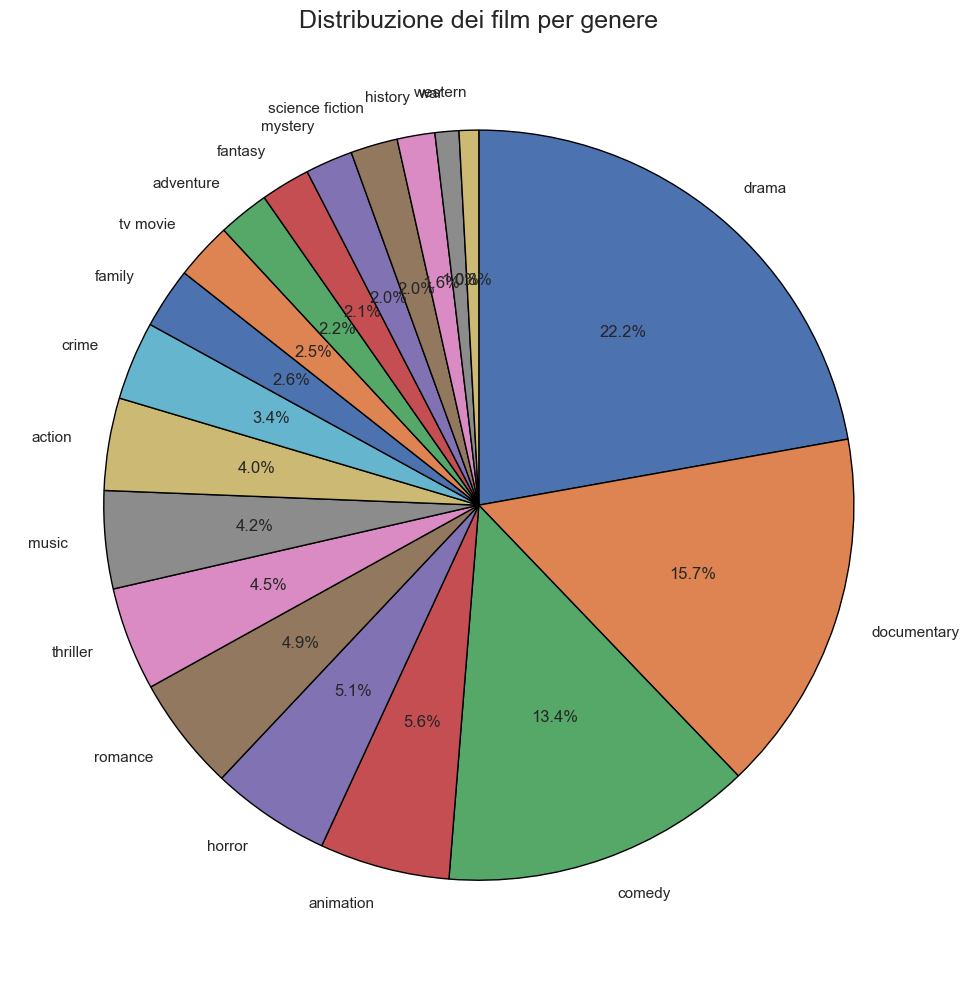

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Rimuove i duplicati in modo effettivo (serve l'assegnazione!)
genres_clean = genres.drop_duplicates(subset=["id", "genre"]).copy()

# Conta il numero di film per genere
genre_counts = genres_clean["genre"].value_counts()



# Plot
plt.figure(figsize=(10, 10))
genre_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribuzione dei film per genere", fontsize=18)
plt.ylabel('')  # Rimuove l'etichetta sull'asse Y
plt.tight_layout()
plt.show()


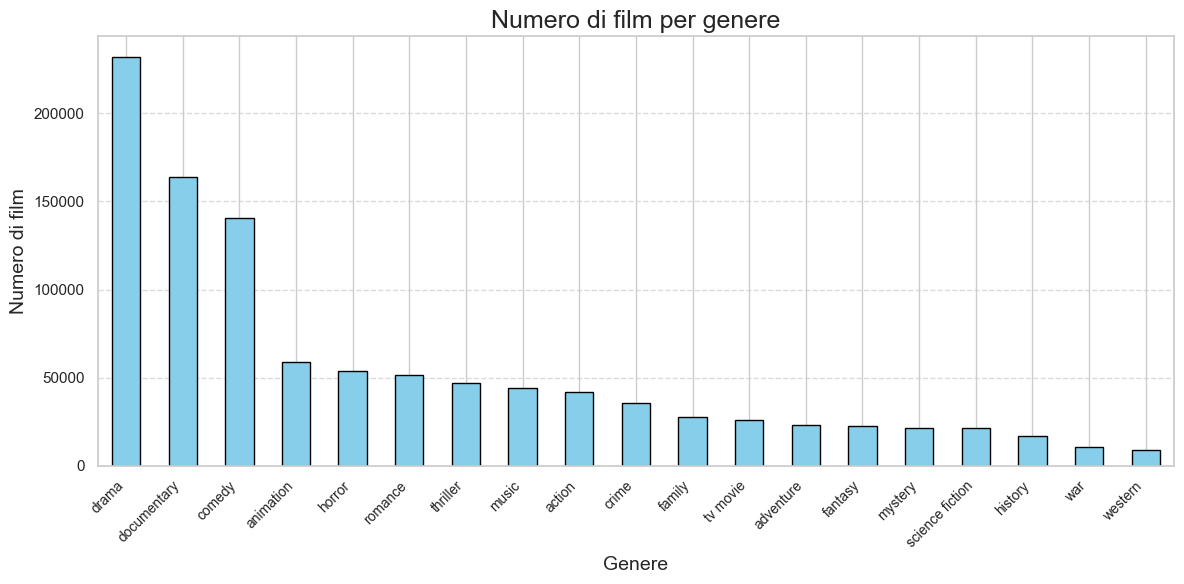

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Rimuove i duplicati in modo effettivo
genres_clean = genres.drop_duplicates(subset=["id", "genre"]).copy()

# Conta il numero di film per genere
genre_counts = genres_clean["genre"].value_counts()

# (Facoltativo) Raggruppa i generi minori in "Altro"
# threshold = 0.02
# total = genre_counts.sum()
# genre_counts_filtered = genre_counts[genre_counts / total >= threshold]
# other = genre_counts[genre_counts / total < threshold].sum()
# if other > 0:
#     genre_counts_filtered["Altro"] = other
# genre_counts = genre_counts_filtered

# Plot a barre
plt.figure(figsize=(12, 6))
genre_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Numero di film per genere", fontsize=18)
plt.xlabel("Genere", fontsize=14)
plt.ylabel("Numero di film", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [94]:
import plotly.express as px

# Aggiungiamo il genere ai film
df_movies_with_genres = pd.merge(movies, genres, on='id', how='inner')

# Filtriamo i film che hanno vinto un Oscar
df_oscars_winners = the_oscar_awards[the_oscar_awards['winner'] == True]

# Uniamo i film vincitori con il genere
df_winning_movies = pd.merge(
    df_oscars_winners,
    df_movies_with_genres,
    left_on=['film', 'year_film'],
    right_on=['name', 'date'],
    how='inner'
)

# Conta numero di Oscar per genere
oscar_counts = df_winning_movies['genre'].value_counts().reset_index()
oscar_counts.columns = ['Genere', 'Oscar Vinti']

# Bar chart interattivo con plotly
fig = px.bar(
    oscar_counts,
    x='Genere',
    y='Oscar Vinti',
    title='Distribuzione degli Oscar vinti per genere',
    text='Oscar Vinti',
    labels={'Oscar Vinti': 'Numero di Oscar', 'Genere': 'Genere'},
    template='plotly_white'
)

fig.update_traces(
    marker_color='skyblue',
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Oscar vinti: %{y}'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Numero di Oscar',
    height=600,
    margin=dict(t=60, b=120)
)

fig.show()


In [95]:
import pandas as pd
import plotly.express as px



# 4. Seleziona le prime 20 lingue
top_languages = language_counts.head(20)

# 5. Crea bar chart verticale con colori discreti
fig = px.bar(
    top_languages,
    x="language",
    y="count",
    text="count",
    title="Top 20 lingue più presenti nei film",
    template="plotly_white",
    color="language",  # Colori per categoria
    color_discrete_sequence=px.colors.qualitative.Plotly  # Colori standard
)

# 6. Miglioramenti estetici
fig.update_layout(
    xaxis_title="Lingua",
    yaxis_title="Numero di Film",
    xaxis_tickangle=-45,
    height=600,
    margin=dict(t=80, l=60, r=60, b=150),
    showlegend=False  # Rimuove legenda perché già si vede sull’asse X
)

fig.update_traces(textposition="outside")

# 7. Mostra il grafico
fig.show()


In [96]:
import pandas as pd
import plotly.express as px




# 3. Conta le lingue diverse per ogni film
language_counts_per_film = languages_clean.groupby("id")["language"].nunique().reset_index()
language_counts_per_film.columns = ["id", "num_languages"]

# 4. Unisci con i titoli dei film
movies_with_languages = pd.merge(movies, language_counts_per_film, on="id")

# 5. Ordina e seleziona i primi 30
top_30_multilang = movies_with_languages.sort_values(by="num_languages", ascending=False).head(25)

# 6. Crea il bar chart
fig = px.bar(
    top_30_multilang,
    x="name",
    y="num_languages",
    text="num_languages",
    title="Top 25 film con il maggior numero di lingue diverse",
    template="plotly_white",
    color="num_languages",
    color_continuous_scale="Viridis"
)

# 7. Miglioramenti estetici
fig.update_layout(
    xaxis_title="Titolo del film",
    yaxis_title="Numero di lingue",
    xaxis_tickangle=-45,
    height=700,
    margin=dict(t=80, l=60, r=60, b=150),
)

fig.update_traces(textposition="outside")

# 8. Mostra il grafico
fig.show()


In [97]:
import pandas as pd
import plotly.express as px

# Carica i dati
languages = pd.read_csv("./main_data/languages.csv")

# Trova tutti i film che contengono l'inglese
english_movies = languages[languages["language"] == "English"]["id"].unique()

# Crea colonna per classificare ogni film: Inglese o Non inglese
languages["english_flag"] = languages["id"].isin(english_movies)

# Conta i film univoci in ciascun gruppo (usiamo set per evitare doppioni)
english_count = len(set(languages[languages["english_flag"] == True]["id"]))
non_english_count = len(set(languages[languages["english_flag"] == False]["id"]) - set(english_movies))

# Crea DataFrame per pie chart
pie_data = pd.DataFrame({
    "category": ["Film in inglese", "Film non in inglese"],
    "count": [english_count, non_english_count]
})

# Grafico a torta con Plotly
fig = px.pie(
    pie_data,
    names="category",
    values="count",
    title="Distribuzione dei film per lingua (inglese vs non inglese)",
    hole=0.3  # per un look tipo 'donut'
)

fig.update_traces(textinfo="percent+label", pull=[0.05, 0])
fig.show()


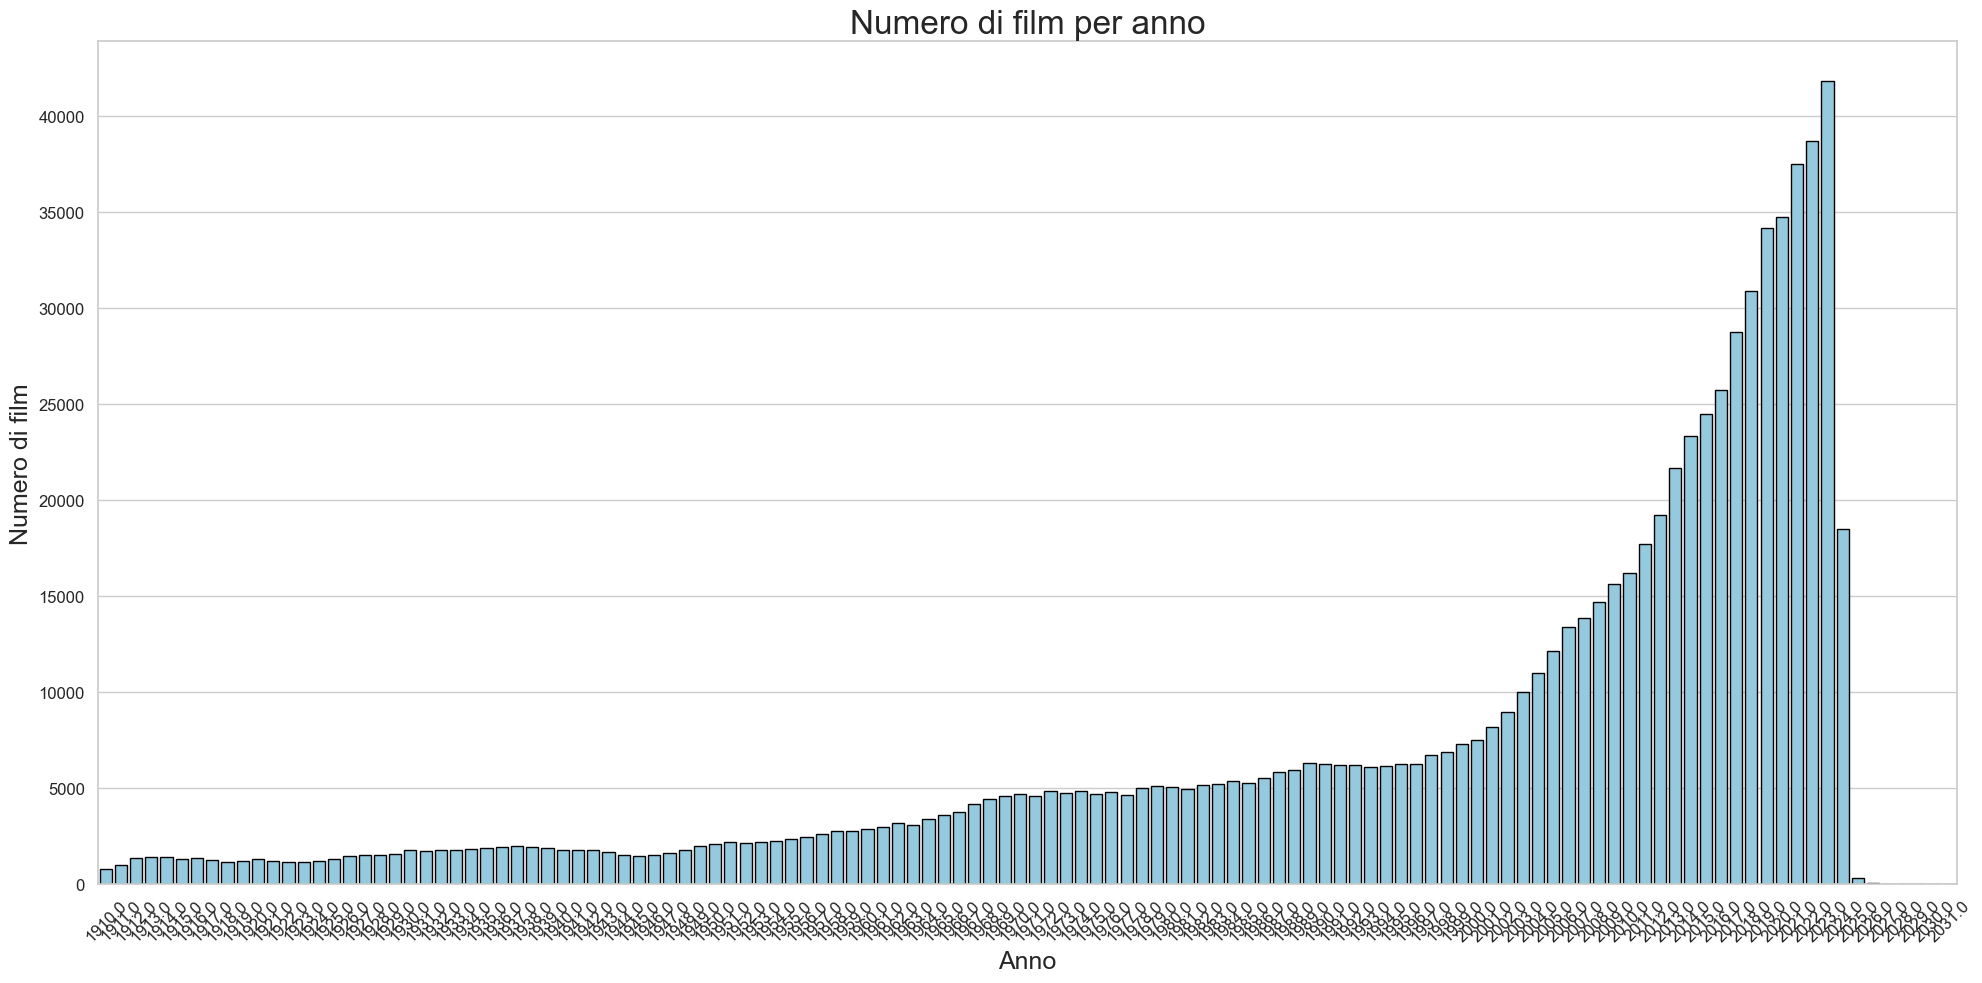

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt


released_movies = movies[movies['id'].isin(releases['id'])].copy()

# Per mancanza di dati droppiamo i film pre 1910
released_movies["year"] = released_movies["date"].dropna().astype(int)
released_movies.drop(released_movies[released_movies["year"] < 1910].index, inplace=True)

# Conta film per anno
film_counts = released_movies["year"].value_counts().sort_index()

# Stile Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(20, 10))
sns.barplot(x=film_counts.index, y=film_counts.values, color="skyblue", edgecolor="black")

plt.title("Numero di film per anno", fontsize=24)
plt.xlabel("Anno", fontsize=18)
plt.ylabel("Numero di film", fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [99]:
import plotly.express as px

# Filtro e conteggio film nel range 1910–1970
range1 = released_movies[(released_movies["year"] >= 1910) & (released_movies["year"] <= 1970)]
counts1 = range1["year"].value_counts().sort_index()

# Trasformo in DataFrame per Plotly
counts1_df = counts1.reset_index()
counts1_df.columns = ["year", "num_films"]

# Grafico Plotly
fig = px.bar(
    counts1_df,
    x="year",
    y="num_films",
    text="num_films",
    title="Numero di film per anno (1910–1970)",
    template="plotly_white",
    labels={"year": "Anno", "num_films": "Numero di film"},
    hover_data={"year": True, "num_films": True}
)

# Personalizzazione layout
fig.update_layout(
    xaxis_title="Anno",
    yaxis_title="Numero di film",
    height=500,
    width=1400,
    xaxis_tickangle=-45,
    margin=dict(t=60, b=100),
)

fig.update_traces(
    marker_color='lightcoral',
    marker_line_color='black',
    marker_line_width=1.2,
    textposition='outside'
)

fig.show()


In [100]:
import plotly.express as px

# Filtro e conteggio film nel range 1910–1970
range1 = released_movies[(released_movies["year"] >= 1971) & (released_movies["year"] <= 2025)]
counts1 = range1["year"].value_counts().sort_index()

# Trasformo in DataFrame per Plotly
counts1_df = counts1.reset_index()
counts1_df.columns = ["year", "num_films"]

# Grafico Plotly
fig = px.bar(
    counts1_df,
    x="year",
    y="num_films",
    text="num_films",
    title="Numero di film per anno (1971–2025)",
    template="plotly_white",
    labels={"year": "Anno", "num_films": "Numero di film"},
    hover_data={"year": True, "num_films": True}
)

# Personalizzazione layout
fig.update_layout(
    xaxis_title="Anno",
    yaxis_title="Numero di film",
    height=500,
    width=1400,
    xaxis_tickangle=-45,
    margin=dict(t=60, b=100),
)

fig.update_traces(
    marker_color='lightcoral',
    marker_line_color='black',
    marker_line_width=1.2,
    textposition='outside'
)

fig.show()


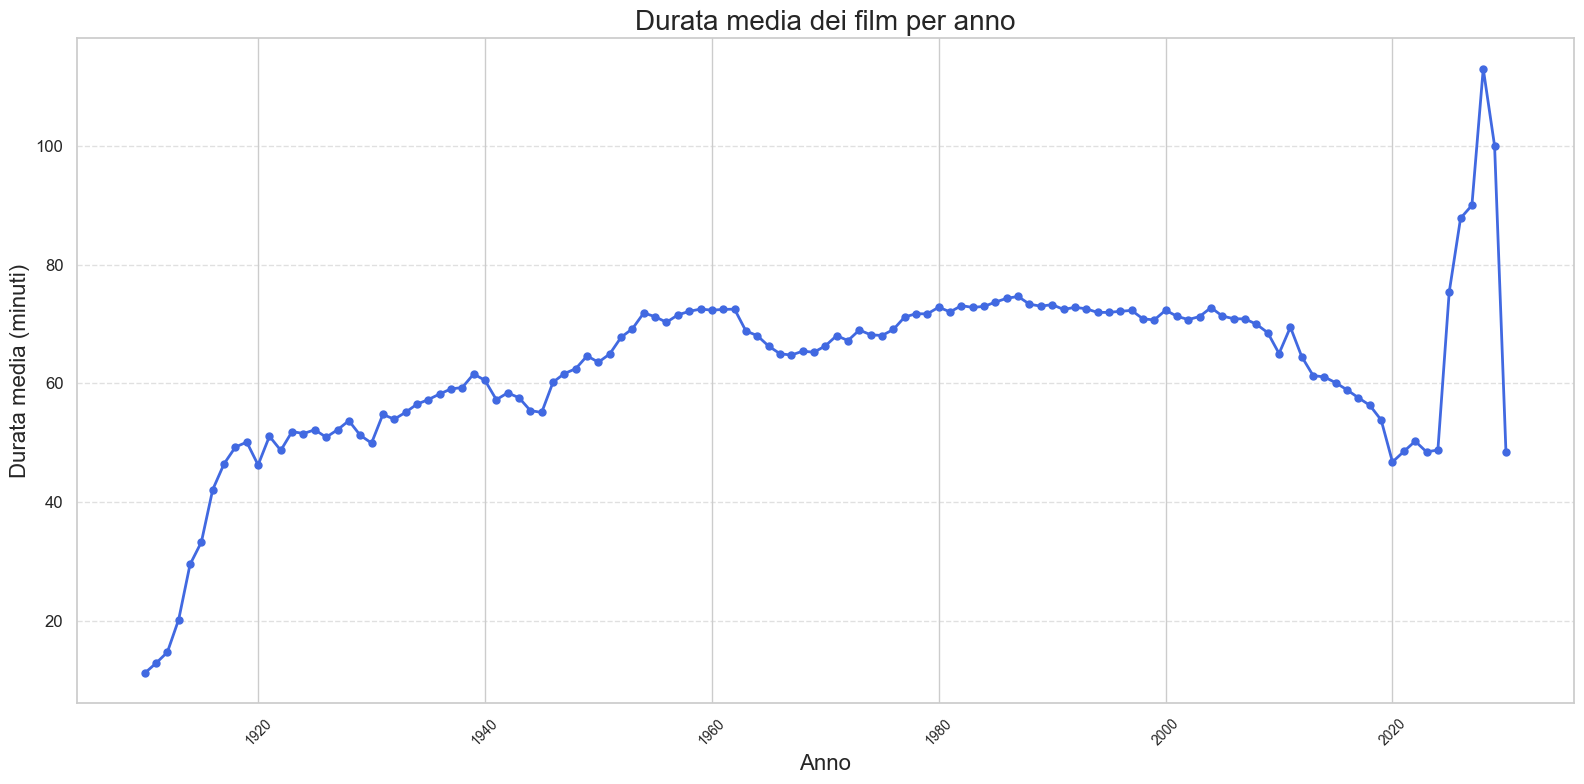

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Conversione sicura dei tipi (evita errori nei dati grezzi)
released_movies["year"] = pd.to_numeric(released_movies["year"], errors="coerce")
released_movies["minutes"] = pd.to_numeric(released_movies["minutes"], errors="coerce")

# Rimozione dei valori nulli e copia del DataFrame per evitare SettingWithCopyWarning
released_movies_clean = released_movies.dropna(subset=["year", "minutes"]).copy()

# Conversione in intero dell'anno
released_movies_clean["year"] = released_movies_clean["year"].astype(int)

# Calcolo della durata media per anno (ordinato per anno)
avg_duration_per_year = released_movies_clean.groupby("year")["minutes"].mean().sort_index()

# Plot della durata media
plt.figure(figsize=(16, 8))
plt.plot(
    avg_duration_per_year.index,
    avg_duration_per_year.values,
    marker='o',
    color="royalblue",
    linestyle='-',
    linewidth=2,
    markersize=5
)

# Personalizzazione del grafico
plt.title("Durata media dei film per anno", fontsize=20)
plt.xlabel("Anno", fontsize=16)
plt.ylabel("Durata media (minuti)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Mostra il grafico
plt.show()


In [102]:
import pandas as pd
import plotly.express as px

# 1. Caricamento dati


# 2. Conta numero di attori per film
actor_counts = actors["id"].value_counts().reset_index()
actor_counts.columns = ["movie_id", "num_actors"]

# 3. Unisci con nomi dei film
actor_counts = actor_counts.merge(movies[["id", "name"]], left_on="movie_id", right_on="id")
actor_counts.drop(columns=["id"], inplace=True)

# 4. Seleziona i top 30
top30 = actor_counts.sort_values("num_actors", ascending=False).head(30)

# 5. Grafico con Plotly
fig = px.bar(
    top30,
    x="name",
    y="num_actors",
    text="num_actors",
    title="Top 30 film con il maggior numero di attori",
    template="plotly_white",
    color="num_actors",
    color_continuous_scale="viridis"
)

# 6. Miglioramenti estetici
fig.update_layout(
    xaxis_title="Film",
    yaxis_title="Numero di attori",
    xaxis_tickangle=45,
    height=700,
    margin=dict(t=80, b=150),
)
fig.update_traces(textposition="outside")

# 7. Mostra grafico
fig.show()


In [103]:
import pandas as pd
import plotly.express as px

# 2. Filtra solo vincitori
df_oscars_winners = the_oscar_awards[the_oscar_awards['winner'] == True]

# 3. Conta il numero di premi per film e anno
film_awards = df_oscars_winners.groupby(["film", "year_film"]).size().reset_index(name="num_awards")

# 4. Crea colonna per distinguere film con stesso nome
film_awards["film_year"] = film_awards["film"] + " (" + film_awards["year_film"].astype(str) + ")"

# 5. Prendi i top 30 film con più premi
top30_awarded = film_awards.sort_values("num_awards", ascending=False).head(30)

# 6. Bar chart Plotly, colore basato su numero di premi
fig = px.bar(
    top30_awarded,
    x="film_year",
    y="num_awards",
    text="num_awards",
    title="Top 30 film con più premi Oscar vinti (distinti per anno)",
    template="plotly_white",
    color="num_awards",
    color_continuous_scale="Viridis"
)

# 7. Miglioramenti estetici
fig.update_layout(
    xaxis_title="Film (Anno)",
    yaxis_title="Numero di Oscar vinti",
    xaxis_tickangle=45,
    height=700,
    margin=dict(t=80, b=150)
)

fig.update_traces(textposition="outside")

# 8. Mostra grafico
fig.show()


In [104]:
# Filtriamo i film usciti dopo il 2010 in releases
filtered_releases = releases[(releases["date"] >= "2010") & (releases["date"]<="2025") & (releases["type"]!="Premiere")]

# Ordiniamo per id e date per prendere la data minima per ciascun film
sorted_releases = filtered_releases.sort_values(by=["id", "date"])

# Rimuoviamo i duplicati mantenendo solo la riga con la data minima per ogni id
unique_releases = sorted_releases.drop_duplicates(subset="id", keep="first")
import pandas as pd
import plotly.graph_objects as go

# 1. Assicura formato datetime e anno
released_movies_type["date"] = pd.to_datetime(released_movies_type["date"])
released_movies_type["year"] = released_movies_type["date"].dt.year

# 2. Filtro
premiere_theatrical = released_movies_type[released_movies_type["type"].isin(["Theatrical"])]
digital = released_movies_type[released_movies_type["type"] == "Digital"]

# 3. Conta release per anno
premiere_theatrical_counts = premiere_theatrical.groupby("year")["id"].count()
digital_counts = digital.groupby("year")["id"].count()

# 4. Totale e percentuali
total_counts = premiere_theatrical_counts.add(digital_counts, fill_value=0)
premiere_theatrical_percentage = (premiere_theatrical_counts / total_counts * 100).fillna(0)
digital_percentage = (digital_counts / total_counts * 100).fillna(0)

# 5. Dataset unico per Plotly
df_percentages = pd.DataFrame({
    "year": total_counts.index,
    "Theatrical %": premiere_theatrical_percentage,
    "Digital %": digital_percentage
}).reset_index(drop=True).sort_values("year")


# 6. Line plot interattivo
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_percentages["year"],
    y=df_percentages["Theatrical %"],
    mode='lines+markers',
    name="Theatrical",
    line=dict(color='blue'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=df_percentages["year"],
    y=df_percentages["Digital %"],
    mode='lines+markers',
    name="Digital",
    line=dict(color='orange'),
    marker=dict(size=6)
))

# 7. Layout
fig.update_layout(
    title="Percentuale relativa delle release per anno (Theatrical vs Digital)",
    xaxis_title="Anno",
    yaxis_title="Percentuale (%)",
    yaxis=dict(range=[0, 100]),
    template="plotly_white",
    hovermode="x unified",
    height=500
)

fig.show()

# Selezioniamo solo le colonne richieste
released_movies_type = unique_releases.merge(
    movies[["id", "name"]], on="id", how="inner"
)[["id", "name", "date", "type"]]

In [105]:
import pandas as pd
import plotly.express as px

# 1. Assicura che la colonna "date" sia in datetime
releases["date"] = pd.to_datetime(releases["date"], errors="coerce")

# 2. Ordina per data e prendi la prima release per ogni film (id)
first_releases = releases.dropna(subset=["date"]).sort_values("date").drop_duplicates(subset="id", keep="first")

# 3. Filtra gli anni nel range 1910–2025
first_releases = first_releases[
    (first_releases["date"].dt.year >= 1910) &
    (first_releases["date"].dt.year <= 2025)
].copy()

# 4. Crea colonna 'quarter' manualmente basata sul mese
def assign_quarter(month):
    if 1 <= month <= 3:
        return "Q1 (Gen-Mar)"
    elif 4 <= month <= 6:
        return "Q2 (Apr-Giu)"
    elif 7 <= month <= 9:
        return "Q3 (Lug-Set)"
    else:
        return "Q4 (Ott-Dic)"

first_releases["quarter"] = first_releases["date"].dt.month.apply(assign_quarter)

# 5. Conta quante release per trimestre
quarter_counts = first_releases["quarter"].value_counts().reset_index()
quarter_counts.columns = ["quarter", "num_releases"]
quarter_counts = quarter_counts.sort_values("quarter")  # Ordina Q1, Q2, ...

# 6. Grafico interattivo con Plotly
fig = px.bar(
    quarter_counts,
    x="quarter",
    y="num_releases",
    text="num_releases",
    title="Numero totale di prime uscite per trimestre (1910–2025)",
    template="plotly_white",
    color="num_releases",
    color_continuous_scale="sunset"
)

fig.update_layout(
    xaxis_title="Trimestre",
    yaxis_title="Numero di release",
    height=500,
    margin=dict(t=60, b=60)
)

fig.update_traces(textposition="outside")

fig.show()


In [106]:
import pandas as pd
import plotly.express as px

# 1. Assicura che la colonna "date" sia datetime
releases["date"] = pd.to_datetime(releases["date"], errors="coerce")

# 2. Prendi solo la prima release per ogni film
first_releases = releases.dropna(subset=["date"]).sort_values("date").drop_duplicates(subset="id", keep="first")

# 3. Filtra anni dal 1910 al 2025
first_releases = first_releases[
    (first_releases["date"].dt.year >= 1910) &
    (first_releases["date"].dt.year <= 2025)
].copy()

# 4. Giorno della settimana (0=Lunedì, 6=Domenica)
first_releases["weekday"] = first_releases["date"].dt.dayofweek
weekday_map = {
    0: "Lunedì",
    1: "Martedì",
    2: "Mercoledì",
    3: "Giovedì",
    4: "Venerdì",
    5: "Sabato",
    6: "Domenica"
}
first_releases["weekday"] = first_releases["weekday"].map(weekday_map)

# 5. Conta release per giorno della settimana
weekday_counts = first_releases["weekday"].value_counts().reindex(weekday_map.values()).reset_index()
weekday_counts.columns = ["weekday", "num_releases"]

# 6. Grafico interattivo
fig = px.bar(
    weekday_counts,
    x="weekday",
    y="num_releases",
    text="num_releases",
    title="Numero totale di prime uscite per giorno della settimana (1910–2025)",
    template="plotly_white",
    color="num_releases",
    color_continuous_scale="tealgrn"
)

fig.update_layout(
    xaxis_title="Giorno della settimana",
    yaxis_title="Numero di release",
    height=500,
    margin=dict(t=60, b=60)
)
fig.update_traces(textposition="outside")

fig.show()


In [107]:
import pandas as pd
import plotly.express as px

# 1. Assicura che la colonna "date" sia in formato datetime
releases["date"] = pd.to_datetime(releases["date"], errors="coerce")

# 2. Prendi solo la prima release per ogni film
first_releases = releases.dropna(subset=["date"]).sort_values("date").drop_duplicates(subset="id", keep="first")

# 3. Filtra solo tra 1910 e 2025
first_releases = first_releases[
    (first_releases["date"].dt.year >= 1910) &
    (first_releases["date"].dt.year <= 2025)
].copy()

# 4. Estrai il mese (numero) e il nome del mese
first_releases["month"] = first_releases["date"].dt.month

# Mappa dei mesi per visualizzazione ordinata
month_map = {
    1: "Gennaio", 2: "Febbraio", 3: "Marzo", 4: "Aprile",
    5: "Maggio", 6: "Giugno", 7: "Luglio", 8: "Agosto",
    9: "Settembre", 10: "Ottobre", 11: "Novembre", 12: "Dicembre"
}
first_releases["month_name"] = first_releases["month"].map(month_map)

# 5. Conta i film per mese
month_counts = first_releases["month_name"].value_counts()
month_counts = month_counts.reindex(list(month_map.values()))  # Ordine corretto dei mesi

month_df = month_counts.reset_index()
month_df.columns = ["month", "num_releases"]

# 6. Grafico Plotly
fig = px.bar(
    month_df,
    x="month",
    y="num_releases",
    text="num_releases",
    title="Numero totale di prime uscite per mese (1910–2025)",
    template="plotly_white",
    color="num_releases",
    color_continuous_scale="sunset"
)

fig.update_layout(
    xaxis_title="Mese",
    yaxis_title="Numero di release",
    height=500,
    margin=dict(t=60, b=60)
)
fig.update_traces(textposition="outside")

fig.show()


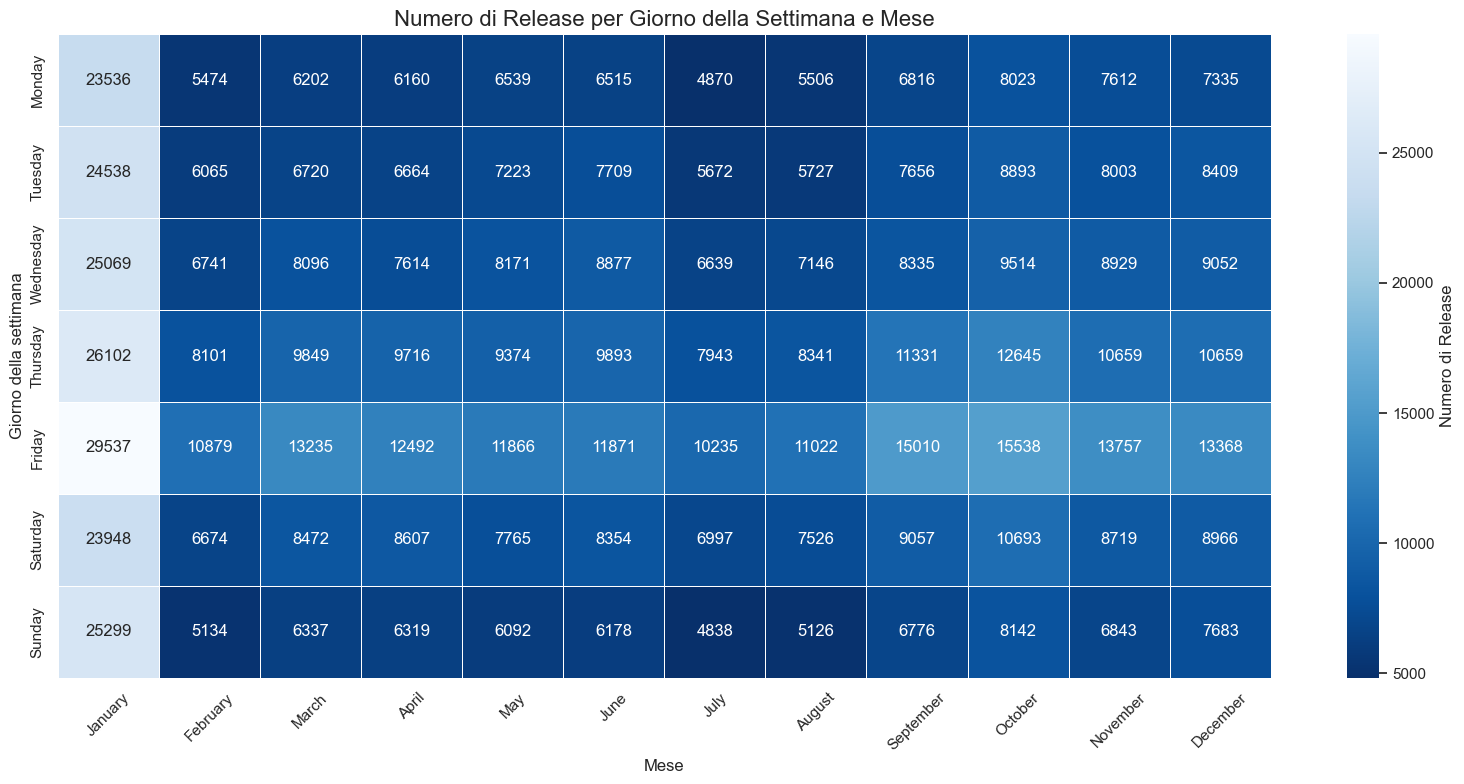

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prima release per ogni film
releases['date'] = pd.to_datetime(releases['date'], errors='coerce')
releases_sorted = releases.sort_values(by='date')
first_releases = releases_sorted.drop_duplicates(subset='id', keep='first').dropna(subset=['date'])

# 2. Estrai mese e giorno della settimana
first_releases['month'] = first_releases['date'].dt.month_name()
first_releases['weekday'] = first_releases['date'].dt.day_name()

# 3. Conta film per (mese, giorno)
heatmap_data = first_releases.groupby(['weekday', 'month']).size().unstack(fill_value=0)

# 4. Ordina i giorni e mesi
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(index=ordered_weekdays, columns=ordered_months)

# 5. Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="Blues_r",  # Invertita: più film = più scuro
    linewidths=0.5,
    cbar_kws={'label': 'Numero di Release'}
)

plt.title("Numero di Release per Giorno della Settimana e Mese", fontsize=16)
plt.xlabel("Mese", fontsize=12)
plt.ylabel("Giorno della settimana", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [109]:
import pandas as pd
import plotly.express as px

# 1. Conta le recensioni per film
review_counts = rotten_tomatoes_review["movie_title"].value_counts().reset_index()
review_counts.columns = ["movie_title", "num_reviews"]

# 2. Prendi i top 30 film con più recensioni
top30_reviews = review_counts.head(30)

# 3. Bar chart con Plotly
fig = px.bar(
    top30_reviews,
    x="movie_title",
    y="num_reviews",
    text="num_reviews",
    title="Top 30 Film con il Maggior Numero di Recensioni",
    template="plotly_white",
    color="num_reviews",
    color_continuous_scale="Tealgrn"
)

# 4. Miglioramenti grafici
fig.update_layout(
    xaxis_title="Film",
    yaxis_title="Numero di Recensioni",
    xaxis_tickangle=45,
    height=700,
    margin=dict(t=80, b=200)
)

fig.update_traces(textposition="outside")

# 5. Mostra il grafico
fig.show()


In [110]:
import pandas as pd
import plotly.express as px
import re

# Dizionario per i voti americani
voti_americani = {
    'A': 1.0, 'A-': 0.9,
    'B+': 0.85, 'B': 0.8, 'B-': 0.75,
    'C+': 0.7, 'C': 0.65, 'C-': 0.6,
    'D+': 0.55, 'D': 0.5, 'D-': 0.45,
    'F+': 0.25, 'F': 0.0
}

# Funzione di normalizzazione dei punteggi
def normalizza_voto(voto):
    if pd.isna(voto):
        return None

    voto = str(voto).strip().upper()

    # Controlla se è nel dizionario americano
    if voto in voti_americani:
        return voti_americani[voto]

    # Cerca formato frazione tipo "3/5", "7 / 10"
    match = re.match(r"^(\d+)\s*/\s*(\d+)$", voto)
    if match:
        num = int(match.group(1))
        den = int(match.group(2))
        if den != 0:
            return num / den
        else:
            return None

    # Prova a convertire direttamente in float (per voti tipo 0.8, 3.5, ecc.)
    try:
        val = float(voto)
        if 0 <= val <= 1:
            return val
        elif 1 < val <= 10:
            return val / 10  # porta su scala 0–1
        else:
            return None
    except:
        return None

# Applica la normalizzazione
rotten_tomatoes_review["normalized_score"] = rotten_tomatoes_review["review_score"].apply(normalizza_voto)

# Filtra solo le recensioni positive e con voto valido
positive_reviews = rotten_tomatoes_review[
    (rotten_tomatoes_review["review_type"] == "Fresh") &
    (rotten_tomatoes_review["normalized_score"].notna())
]

# Calcola la media dei punteggi normalizzati per film
average_scores = (
    positive_reviews.groupby("movie_title")["normalized_score"]
    .mean()
    .reset_index()
)

# Ordina e seleziona i top 30
top30_avg_scores = average_scores.sort_values("normalized_score", ascending=False).head(50)

# Plotly bar chart
fig = px.bar(
    top30_avg_scores,
    x="movie_title",
    y="normalized_score",
    text="normalized_score",
    title="Top 30 Film con la Migliore Media di Recensioni Positive (Normalizzate)",
    template="plotly_white",
    color="normalized_score",
    color_continuous_scale="Agsunset"
)

# Layout migliorato
fig.update_layout(
    xaxis_title="Film",
    yaxis_title="Media Normalizzata",
    xaxis_tickangle=45,
    height=800,
    margin=dict(t=80, b=200)
)
fig.update_traces(texttemplate="%{text:.2f}", textposition="outside")

# Mostra il grafico
fig.show()


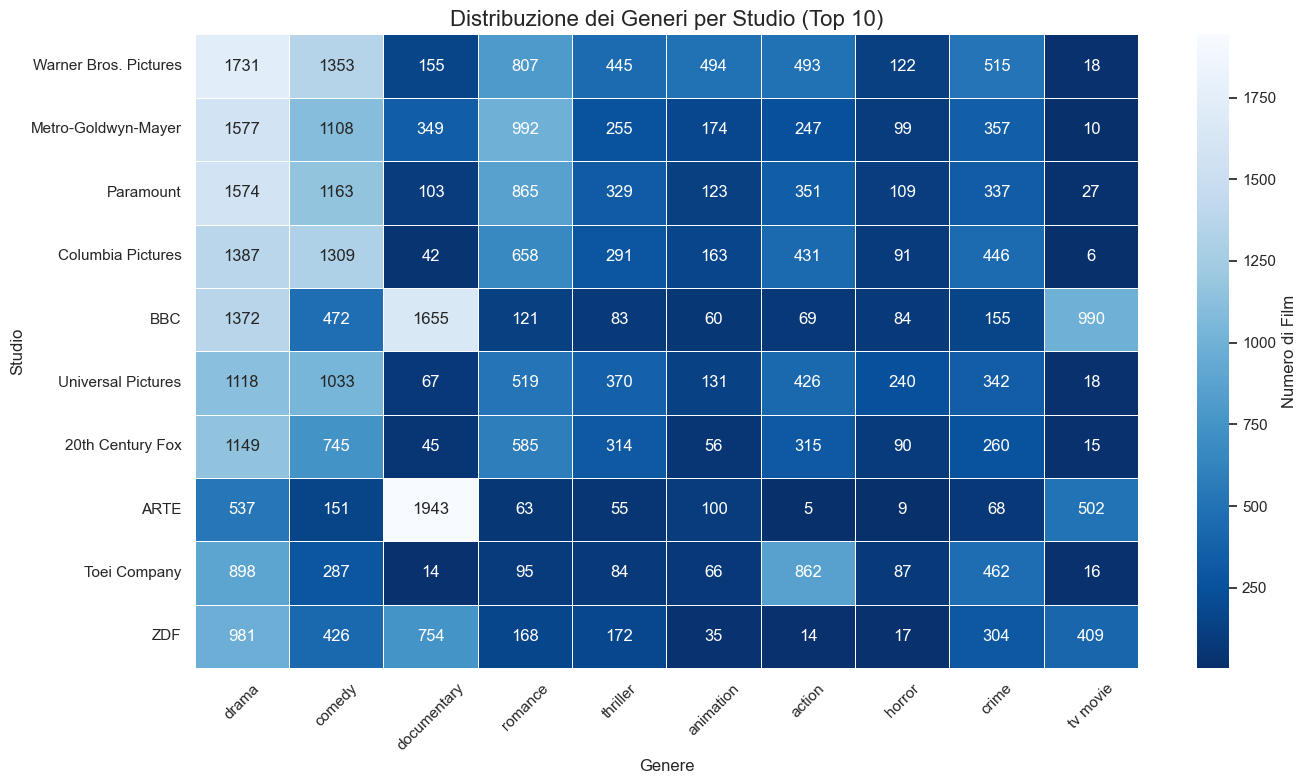

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unione film + generi
movies_genres = pd.merge(
    movies[['id', 'name']],
    genres,
    on='id',
    how='left'
)

# Aggiunta dello studio
movies_genres_studios = pd.merge(
    movies_genres,
    studios[['id', 'studio']],
    on='id',
    how='left'
)

# Aggiunta delle informazioni sugli Oscar
merged_data = pd.merge(
    movies_genres_studios,
    the_oscar_awards[['film', 'category']],
    left_on='name',
    right_on='film',
    how='left'
)

# Raggruppamento per studio e genere
genre_studio_counts = merged_data.groupby(['studio', 'genre']).size().unstack(fill_value=0)

# Selezione dei top 10 studi e top 10 generi
top_studios = genre_studio_counts.sum(axis=1).nlargest(10).index
top_genres = genre_studio_counts.sum(axis=0).nlargest(10).index

# Filtro del dataframe per i top selezionati
filtered_counts = genre_studio_counts.loc[top_studios, top_genres]

# Ordinamento (facoltativo) per rendere il grafico più leggibile
filtered_counts = filtered_counts.sort_index()
genre_studio_counts_filtered = genre_studio_counts.loc[top_studios, top_genres]
# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    genre_studio_counts_filtered,
    annot=True,
    fmt="d",
    cmap="Blues_r",  # Invertita: più film = più scuro
    linewidths=0.5,
    cbar_kws={'label': 'Numero di Film'}
)

plt.title("Distribuzione dei Generi per Studio (Top 10)", fontsize=16)
plt.xlabel("Genere", fontsize=12)
plt.ylabel("Studio", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



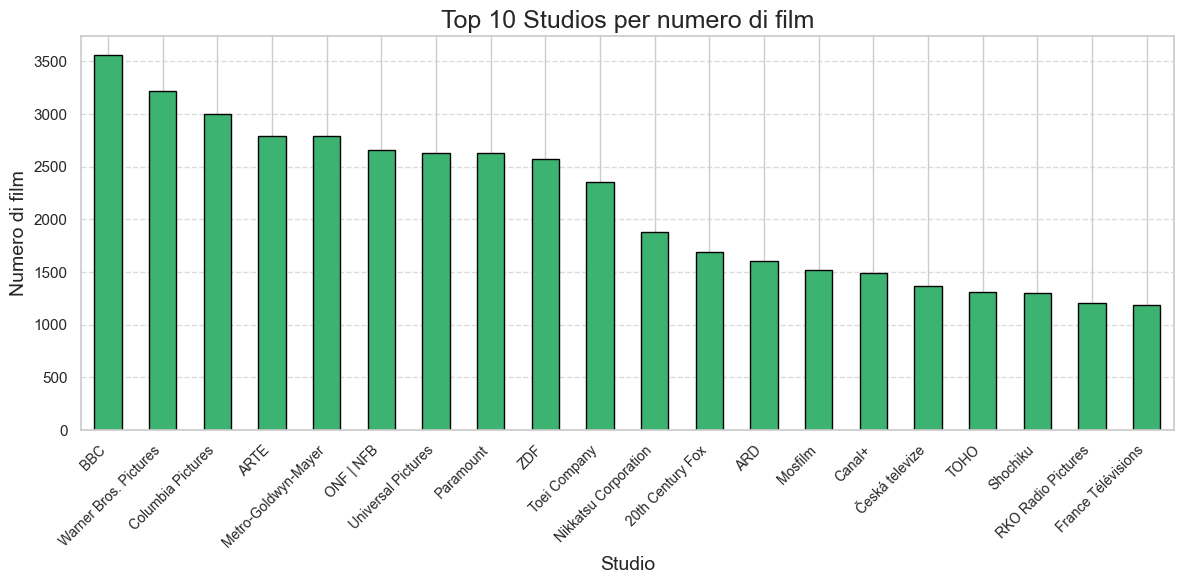

In [111]:
studios_clean = studios.drop_duplicates(subset=["id", "studio"]).copy()

# Conta i film per studio
studio_counts = studios_clean["studio"].value_counts()

# (Facoltativo) Mostra solo i top 10 studi con più film
studio_counts = studio_counts.head(20)

# Plot a barre
plt.figure(figsize=(12, 6))
studio_counts.plot(
    kind='bar',
    color='mediumseagreen',
    edgecolor='black'
)

plt.title("Top 10 Studios per numero di film", fontsize=18)
plt.xlabel("Studio", fontsize=14)
plt.ylabel("Numero di film", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [112]:
import plotly.express as px
df_movies_with_oscar = pd.merge(
    movies,
    the_oscar_awards,
    left_on=["name", "date"],
    right_on=["film", "year_film"],
    how="inner"
)

# 2. Merge con studios per ottenere il nome dello studio
df_movies_with_studios = pd.merge(
    df_movies_with_oscar,
    studios[["id", "studio"]],
    on="id",
    how="inner"
)

# 3. Filtriamo solo i film che hanno effettivamente vinto
df_winning_movies = df_movies_with_studios[df_movies_with_studios["winner"] == True].copy()

# 4. Contiamo quanti Oscar ha vinto ogni studio
oscar_counts_by_studio = (
    df_winning_movies["studio"]
    .value_counts()
    .sort_values(ascending=False)
    .head(50)  # top 50
)

# Prepara i dati in un DataFrame
top_studios_df = oscar_counts_by_studio.reset_index()
top_studios_df.columns = ['Studio', 'Oscar Vinti']

# Crea il grafico interattivo
fig = px.bar(
    top_studios_df,
    x='Studio',
    y='Oscar Vinti',
    title='Top 50 Studios per Numero di Oscar Vinti',
    text='Oscar Vinti',
    labels={'Studio': 'Studio Cinematografico', 'Oscar Vinti': 'Numero di Oscar'},
    template='plotly_white'
)

# Tooltip automatico: mostra Studio + Oscar
fig.update_traces(hovertemplate='<b>%{x}</b><br>Oscar vinti: %{y}')

# Migliora layout
fig.update_layout(
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=60, b=120),
    height=600
)

fig.show()


In [118]:

# 2. Normalizza i nomi dei paesi
countries["country"] = (
    countries["country"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({
        "russian federation": "russia",
        "ussr": "russia",
        "uk": "united kingdom",
        "usa": "united states of america",
        "yugoslavia": "serbia",
        "serbia and montengero": "serbia",
        "east germany" : "germany",
        "Czechoslovakia": "Czechia"

    })
)



# 4. Conta le righe totali in cui compare Russia (inclusi duplicati o co-produzioni)
total_rows_russian = countries[countries["country_clean"] == "russia"].shape[0]

# 5. Stampa il risultato
print(f"Totale righe che menzionano Russia/USSR: {total_rows_russian}")




Totale righe che menzionano Russia/USSR: 21003
